#### 1 - 3 summarized below:

#### Lineraly Seperable Experiment
  - **Training data:** X training points were randomly generated (values bounded between -100 and 100). Y training labels were generated by applying a randomly generated target function to the X training points.
  - **Test data:** X test points were randomly generated (values bounded between -100 and 100). Y test labels were generated by applying the same target function to the X test points.

#### Non-lineraly Separable Experiment
  - **Training data:** X training points were randomly generated (values bounded between -100 and 100). Y training labels randomly generated (-1 and 1). Then, the randomly generated target function was applied with a probaility of .75 to create 'somewhat' lineraly separable data.
  - **Test data:** X test points were randomly generated (values bounded between -100 and 100).  Y test labels randomly generated (-1 and 1). Then, the randomly generated target function was applied with a probaility of .75 to create 'somewhat' lineraly separable data.


**4.** The initial choice of the weights is random.

#### Answers to questions 5 - 8 can be seen in the statistics (and graphs) on pages 3-4.

#### Variation Results
1. The weights that give the lowest in-sample error rate is best.
2. The step size correlates with the amount the vector changes. i.e., A larger step size makes the vector adjustment larger.
3. It is best to consider training points that reduce the error rate the most first.

---------- Linearly Separable Data ----------
Number of iterations        : 4
Number of vector updates    : 43
Hypothesis                  : y = 0.72x + -0.63
In Sample (Training) Error  : 0.00%
Target Function             : y = 0.72x + -0.83
Out of Sample (Test) Error  : 0.00%

-------- Non-Linearly Separable Data --------
Number of iterations        : 10514
Number of vector updates    : 100004
Hypothesis                  : y = 0.16x + 9.54
In Sample (Training) Error  : 4.00%
Out of Sample (Test) Error  : 23.33%


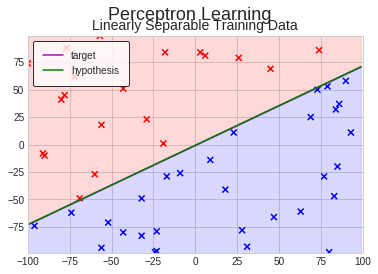

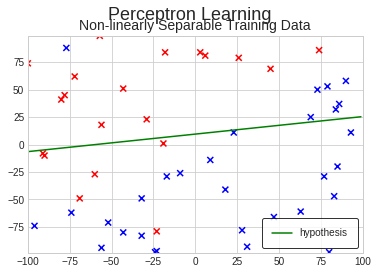

In [1]:
%matplotlib inline

import numpy as np
import random
from perceptron_learning import Perceptron
from perceptron_learning import two_d_vector as tdv


def main():
    bound = 100  # the value that the x and y values are bounded by
    num_pts = 80
    num_train_pts = 50

    perceptron = Perceptron(alpha=0.005)

    target_fn = np.random.uniform(-10, 10, 3)

    x = get_random_x(num_pts, bound)

    x_train, x_test = x[:num_train_pts, :], x[num_train_pts:, :]
    y_test = np.sign(np.dot(x_test, target_fn))

    print('---------- Linearly Separable Data ----------')
    perceptron.fit(x_train, target_fn=target_fn)
    predictions = perceptron.predict(x_test)
    print('{:28s}: y = {:.2f}x + {:.2f}'.format('Target Function',
                                                tdv.get_slope(target_fn),
                                                tdv.get_y_intercept(target_fn)))
    print_error(predictions, y_test)

    print()

    y = get_y(x[:, 1:], target_fn)
    y_train, y_test = y[:num_train_pts], y[num_train_pts:]

    print('-------- Non-Linearly Separable Data --------')
    perceptron.fit(x_train, y_train=y_train)
    predictions = perceptron.predict(x_test)
    print_error(predictions, y_test)

    perceptron.visualize_training()


def print_error(predictions, y_test):
    error = np.sum(np.not_equal(predictions, y_test)) / y_test.shape[0]
    print('{0:28s}: {1:.2f}%'.format('Out of Sample (Test) Error', error * 100))


def get_y(training_pts, w_target):
    # Have y be somewhat linearly separable
    y = np.random.choice([-1, 1], training_pts.shape[0])

    for i, pt in enumerate(training_pts):
        pct_chance = .75
        pt_above_line = tdv.pt_above_line(pt, w_target)

        if pt_above_line and random.random() < pct_chance:
            y[i] = 1
        if not pt_above_line and random.random() < pct_chance:
            y[i] = -1

    return y


def get_random_x(num_points, bound):
    pts = get_random_pts(num_points, bound)
    x = np.insert(pts, 0, 1, axis=1)  # Let x0 equal 1
    return x


def get_random_pts(num_points, bound):
    return np.random.randint(-bound, bound, size=(num_points, 2))


if __name__ == '__main__':
    main()


In [ ]:
"""
two_d_vector.py

Functions that operate on 2d vectors.

w0 (or x0) is a bias "dummy" weight,
so even though the vector is 3 dimensional,
we call it a 2 dimensional vector.

"""


import numpy as np
from random import uniform


def get_perpendicular_vector(w):
    # Two lines are perpendicular if: m1 * m2 = -1.
    # The two slopes must be negative reciprocals of each other.
    m1 = get_slope(w)
    m2 = -1 / m1

    # m2 = - w[1] / w[2]
    random_num = uniform(0, 10)
    return np.array([uniform(0, 10), -1 * m2 * random_num, random_num])


def get_line(w, x_bound):
    x_range = np.array(range(-x_bound, x_bound))

    # Formula for line is: w1x1 + w2x2 + w0 = 0
    # we let x2 = y, and x1 = x, then solve for y = mx + b
    slope = get_slope(w)
    y_intercept = get_y_intercept(w)
    y_line = (slope * x_range) + y_intercept

    return x_range, y_line


def pt_above_line(pt, w):
    return pt[1] > get_slope(w) * pt[0] + get_y_intercept(w)


def get_y_intercept(w):
    return - w[0] / w[2]


def get_slope(w):
    return - w[1] / w[2]


In [ ]:
"""
DataVisualizer.py
"""


import numpy as np
import matplotlib.pyplot as plt
from . import two_d_vector as tdv


class DataVisualizer:
    def __init__(self, title, subtitle, x_bound, y_bound):
        plt.style.use('seaborn-whitegrid')
        self.fig, self.ax = plt.subplots()
        self.title = title
        self.subtitle = subtitle
        self.x_bound = x_bound
        self.y_bound = y_bound

    def setup_axes(self):
        self.ax.cla()
        self.fig.canvas.set_window_title(self.subtitle)
        self.fig.suptitle(self.title, fontsize=18)
        self.ax.set_title(self.subtitle, fontsize=14)
        self.ax.set_xlim(-self.x_bound, self.x_bound)
        self.ax.set_ylim(-self.y_bound, self.y_bound)

    @staticmethod
    def red_pts_above_line(pts, w_target, true_classes):
        pt_above_line = tdv.pt_above_line(pts[0, :], w_target)

        pt_is_positive_class = true_classes[0] > 0

        if pt_above_line and pt_is_positive_class:
            # positive pt above line
            return True
        if not pt_above_line and not pt_is_positive_class:
            # negative pt below line
            return True

        return False

    def plot_hypothesis(self, pts, true_classes, w_hypothesis, w_target=None):
        self.setup_axes()

        self.ax.scatter(x=pts[:, 0], y=pts[:, 1], marker='x',
                        color=['r' if sign >= 0 else 'b' for sign in true_classes])

        if w_target is not None:
            x, y = tdv.get_line(w_target, self.x_bound)
            self.ax.plot(x, y, label='target', color='m')

        x, y = tdv.get_line(w_hypothesis, self.x_bound)
        self.ax.plot(x, y, label='hypothesis', color='g')

        if w_target is not None:
            if self.red_pts_above_line(pts, w_target, true_classes):
                self.ax.fill_between(x, y, np.full((1,), self.y_bound), color=(1, 0, 0, 0.15))
                self.ax.fill_between(x, y, np.full((1,), -self.y_bound), color=(0, 0, 1, 0.15))
            else:
                self.ax.fill_between(x, y, np.full((1,), self.y_bound), color=(0, 0, 1, 0.15))
                self.ax.fill_between(x, y, np.full((1,), -self.y_bound), color=(1, 0, 0, 0.15))

        self.ax.legend(facecolor='w', fancybox=True, frameon=True, edgecolor='black', borderpad=1)

        # plt.pause(0.01)

    @staticmethod
    def visualize():
        plt.show()



In [ ]:
"""
Logger.py
"""


class Logger:
    def __init__(self):
        self.num_iterations = 0
        self.num_vector_updates = 0

    def print_statistics(self):
        print('{:28s}: {:}'.format('Number of iterations', self.num_iterations))
        print('{:28s}: {:}'.format('Number of vector updates', self.num_vector_updates))


In [ ]:
"""
Perceptron.py
"""


import numpy as np
from . import two_d_vector as tdv
from . import DataVisualizer, Logger


class Perceptron:
    """Uses 'pocket' algorithm to keep best hypothesis in it's 'pocket'"""

    def __init__(self, alpha):
        self.alpha = alpha

        self.best_hypothesis = np.random.uniform(-10, 10, 3)
        self.lowest_error = float('inf')

        self.logger = Logger()
        self.dv = None

    def fit(self, x_train, y_train=None, target_fn=None):
        """Fits the model to the training data (class labels) or target function.

        :param x_train: the training data
        :param y_train: will be passed in in the non-linearly separable case
        :param target_fn: will be passed in in the linearly separable case
        :return: None
        """
        self.best_hypothesis = np.random.uniform(-10, 10, 3)
        self.lowest_error = float('inf')
        self.logger = Logger()

        self.dv = get_data_visualizer(target_fn, x_train)

        if target_fn is not None:
            y_train = np.sign(np.dot(x_train, target_fn))
            self.best_hypothesis = tdv.get_perpendicular_vector(target_fn)

        pts = x_train[:, 1:]

        hypothesis = self.best_hypothesis

        misclassified_pts = predict_and_evaluate(hypothesis, x_train, y_train)

        while self.logger.num_vector_updates < 100000 and np.sum(misclassified_pts) > 0:
            for i, misclassified_pt in enumerate(np.nditer(misclassified_pts)):
                if misclassified_pt:
                    # update rule: w(t + 1) = w(t) + y(t) * x(t) * alpha
                    hypothesis += y_train[i] * x_train[i] * self.alpha

                    these_misclassified_pts = predict_and_evaluate(hypothesis, x_train, y_train)

                    this_error = calculate_error(np.sum(these_misclassified_pts), x_train.shape[0])

                    if this_error < self.lowest_error:
                        self.best_hypothesis = hypothesis
                        self.lowest_error = this_error

                    self.logger.num_vector_updates += 1

            misclassified_pts = predict_and_evaluate(hypothesis, x_train, y_train)

            self.logger.num_iterations += 1

        self.dv.plot_hypothesis(pts, y_train, self.best_hypothesis, target_fn)

        self.print_fit_statistics()

    def print_fit_statistics(self):
        self.logger.print_statistics()

        print('{:28s}: y = {:.2f}x + {:.2f}'.format('Hypothesis',
                                                    tdv.get_slope(self.best_hypothesis),
                                                    tdv.get_y_intercept(self.best_hypothesis)))
        print('{0:28s}: {1:.2f}%'.format('In Sample (Training) Error', self.lowest_error * 100))

    def visualize_training(self):
        self.dv.visualize()

    def predict(self, x):
        return predict(x, self.best_hypothesis)


def predict_and_evaluate(hypothesis, x_train, y_train):
    pred_classes = predict(hypothesis, x_train)
    misclassified_pts = np.not_equal(pred_classes, y_train)
    return misclassified_pts


def predict(x, hypothesis):
    return np.sign(np.dot(x, hypothesis.T))


def calculate_error(num_misclassified_pts, num_pts):
    return num_misclassified_pts / float(num_pts)


def get_data_visualizer(target_fn, x_train):
    plot_title = 'Perceptron Learning'

    if target_fn is not None:
        plot_subtitle = 'Linearly Separable Training Data'
    else:
        plot_subtitle = 'Non-linearly Separable Training Data'

    x_bound = np.max(np.absolute(x_train[:, 1]))
    y_bound = np.max(np.absolute(x_train[:, 2]))

    return DataVisualizer(plot_title, plot_subtitle, x_bound, y_bound)
